In [ ]:
!pip install shap 

     |████████████████████████████████| 564 kB 27.7 MB/s 


In [ ]:
import pandas as pd 

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csv/poses0.csv")
data.columns = data.columns.map(lambda row: "_".join(row.lower().split(" ")))
data

,class,nose_x1,nose_y1,nose_z1,nose_v1,left_eye_inner_x2,left_eye_inner_y2,left_eye_inner_z2,left_eye_inner_v2,left_eye_x3,left_eye_y3,left_eye_z3,left_eye_v3,left_eye_outer_x4,left_eye_outer_y4,left_eye_outer_z4,left_eye_outer_v4,right_eye_inner_x5,right_eye_inner_y5,right_eye_inner_z5,right_eye_inner_v5,right_eye_x6,right_eye_y6,right_eye_z6,right_eye_v6,right_eye_outer_x7,right_eye_outer_y7,right_eye_outer_z7,right_eye_outer_v7,left_ear_x8,left_ear_y8,left_ear_z8,left_ear_v8,right_ear_x9,right_ear_y9,right_ear_z9,right_ear_v9,mouth_left_x10,mouth_left_y10,mouth_left_z10,...,left_hip_x24,left_hip_y24,left_hip_z24,left_hip_v24,right_hip_x25,right_hip_y25,right_hip_z25,right_hip_v25,left_knee_x26,left_knee_y26,left_knee_z26,left_knee_v26,right_knee_x27,right_knee_y27,right_knee_z27,right_knee_v27,left_ankle_x28,left_ankle_y28,left_ankle_z28,left_ankle_v28,right_ankle_x29,right_ankle_y29,right_ankle_z29,right_ankle_v29,left_heel_x30,left_heel_y30,left_heel_z30,left_heel_v30,right_heel_x31,right_heel_y31,right_heel_z31,right_heel_v31,left_foot_index_x32,left_foot_index_y32,left_foot_index_z32,left_foot_index_v32,right_foot_index_x33,right_foot_index_y33,right_foot_index_z33,right_foot_index_v33
0,Mabu,0.338949,0.267868,-0.192381,0.999615,0.338756,0.255450,-0.176463,0.998945,0.339873,0.254999,-0.176596,0.998553,0.341137,0.254738,-0.176504,0.998847,0.333120,0.255742,-0.187695,0.999501,0.331182,0.255966,-0.187915,0.999604,0.327936,0.256448,-0.188019,0.999771,0.337387,0.260378,-0.088233,0.997616,0.319821,0.262514,-0.140182,0.999173,0.340191,0.278842,-0.157206,...,0.338104,0.474091,0.028278,0.999992,0.304045,0.476763,-0.028321,0.999995,0.389403,0.526622,-0.046904,0.991401,0.272857,0.551180,-0.193633,0.995437,0.378650,0.613816,0.118790,0.991106,0.257533,0.644612,-0.034176,0.994075,0.370250,0.632483,0.131388,0.947696,0.261459,0.661611,-0.020487,0.909678,0.404543,0.637727,0.067369,0.985126,0.245939,0.678501,-0.097650,0.986881
1,Mabu,0.341362,0.272906,-0.172833,0.999878,0.341833,0.263022,-0.157755,0.999648,0.342892,0.263038,-0.157874,0.999495,0.344387,0.262957,-0.157804,0.999626,0.336266,0.262315,-0.167721,0.999823,0.334304,0.261950,-0.167917,0.999849,0.330992,0.261893,-0.167992,0.999910,0.340481,0.266877,-0.074446,0.999248,0.323322,0.267161,-0.120566,0.999665,0.342380,0.283354,-0.139852,...,0.337365,0.471839,0.025845,0.999994,0.303371,0.473770,-0.025889,0.999996,0.390144,0.523025,-0.064359,0.991054,0.274094,0.550205,-0.184758,0.995966,0.379134,0.612386,0.090963,0.988904,0.258000,0.641706,-0.032206,0.993602,0.370303,0.629964,0.102698,0.944065,0.261902,0.659337,-0.019190,0.903474,0.403932,0.632878,0.042807,0.983703,0.245826,0.677713,-0.090687,0.986446
2,Mabu,0.343300,0.273654,-0.145198,0.999949,0.343889,0.264594,-0.129308,0.999866,0.345471,0.265315,-0.129413,0.999805,0.346664,0.265763,-0.129361,0.999844,0.338547,0.262606,-0.139911,0.999944,0.335512,0.262279,-0.140089,0.999952,0.333033,0.262279,-0.140159,0.999969,0.343149,0.268845,-0.046103,0.999777,0.324440,0.268259,-0.094624,0.999913,0.344313,0.285089,-0.112699,...,0.338920,0.473242,0.025878,0.999995,0.304670,0.475139,-0.025921,0.999997,0.390094,0.520264,-0.064730,0.988549,0.271820,0.550150,-0.155272,0.995461,0.378278,0.610606,0.085396,0.974737,0.257489,0.643484,-0.027879,0.992741,0.370070,0.628985,0.097053,0.926425,0.261310,0.660515,-0.017373,0.907558,0.402237,0.634145,0.046420,0.964670,0.245234,0.675632,-0.082495,0.982250
3,Mabu,0.341744,0.275978,-0.036437,1.000000,0.344508,0.270824,-0.024877,0.999999,0.346587,0.271096,-0.024926,0.999997,0.347991,0.271438,-0.024918,0.999998,0.338584,0.271077,-0.034792,1.000000,0.335989,0.271552,-0.034916,1.000000,0.333015,0.272075,-0.034929,1.000000,0.346324,0.274104,0.035602,0.999999,0.325487,0.275386,-0.009625,0.999999,0.344862,0.288590,-0.012205,...,0.337501,0.449761,0.019726,1.000000,0.309539,0.452346,-0.019773,1.000000,0.392847,0.522109,-0.055350,0.975395,0.271419,0.549327,-0.070882,0.968005,0.379128,0.611982,0.043554,0.673479,0.258823,0.641550,-0

In [ ]:
X=data.drop('class',axis=1)#features
y=data['class']#target value

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time
import xgboost

X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2, random_state=0)

shap.initjs()

In [ ]:
model = xgboost.XGBClassifier(objective="binary:logistic", max_depth=4, n_estimators=10)
model.fit(X_train, Y_train)

XGBClassifier(max_depth=4, n_estimators=10, objective='multi:softprob')

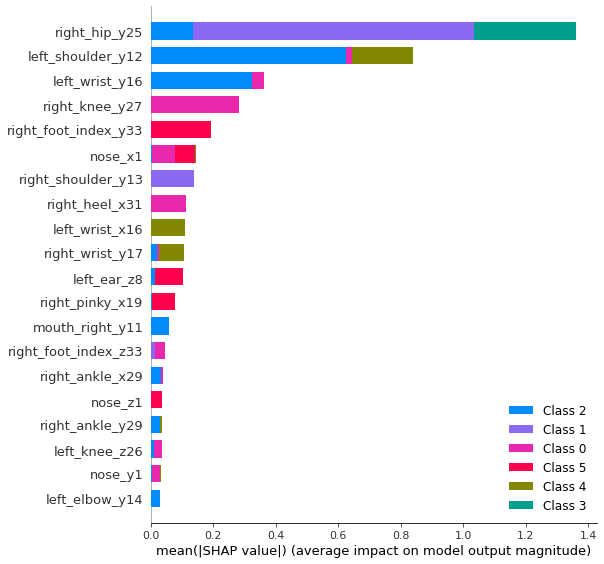

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_test)
shap.summary_plot(shap_values, X_test)

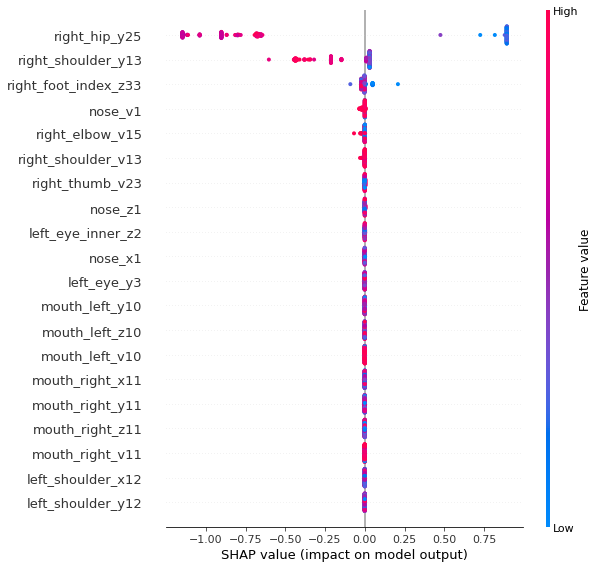

In [ ]:
shap.summary_plot(shap_values[1], X_test, feature_names = X.columns)